#  Example of How to train and plot the decision boundary of a neuron

This example shows how to plot a decision boundary and color the negative and positive regions accordingly.


Thakur, Nishant

In [12]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as c
import time

In [14]:
def generate_random_points(num):
    points = np.random.randint(-10, high = 10, size=(2, num))
    return points

In [23]:
def plot(weights, bias, points1, points2):
    fig = plt.figure()
    ax = fig.gca()
    resolution=100
    xs = np.linspace(-10., 10., resolution)
    ys = np.linspace(-10., 10., resolution)
    xx, yy = np.meshgrid(xs, ys)
    zz = weights[0] * xx + weights[1] * yy + bias
    zz[zz<0] =- 1
    zz[zz>0] =+ 1
    cMap = c.ListedColormap(['g','r'])
    quad = ax.pcolormesh(xs, ys, zz, cmap = cMap)
    p1 = points1.T
    p2 = points2.T
    ax.scatter(p1[0], p1[1], marker='^', color = 'k')
    ax.scatter(p2[0], p2[1], marker='o', color = 'b')
    black_patch = mpatches.Patch(color='black', label='Target = -1')
    blue_patch = mpatches.Patch(color='blue', label='Target = 1')
    plt.legend(handles=[black_patch, blue_patch])

    plt.show()

In [16]:
def activation(input_array,weights,bias):
    net_value = np.dot(weights, input_array.T) + bias
    return 1 if net_value >= 0 else -1
#     return net_value

In [17]:
def train(X, Y, weights, bias):
    for i in range(100):
        index = np.random.choice(X.shape[0], 1, replace=False)
        a = activation(X[index][0], weights, bias)
        e = Y[index] - a
        weights = weights + e * X[index]
        bias = bias + e
    plot(weights[0], bias, X[:2], X[2:])

    return weights[0],bias


In [18]:
weights = np.array([1, 1])
bias = 0

[[-4  8]
 [-2  4]] [[ 0 -3]
 [-6 -1]]


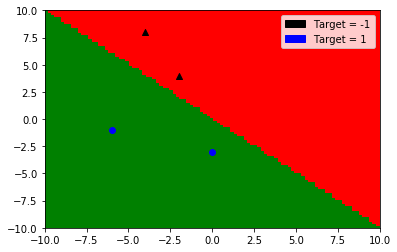

In [26]:
points1 = generate_random_points(2)
points2 = generate_random_points(2)
print(points1,points2)
plot([1,1],0, points1, points2)

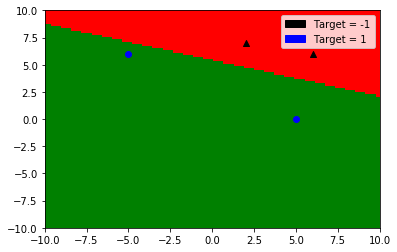

[1 3] [-16]


In [20]:
X = np.concatenate((points1, points2), axis=0)
weights, bias = train(X, np.array([1, 1, -1, -1]), weights, bias)
print(weights, bias)